In [191]:
!pip install pandas scikit-learn matplotlib ipywidgets IPython


In [192]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import ipywidgets as widgets
from IPython.display import display

In [193]:
df = pd.read_csv('sloth_data.csv')
df

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...,...
4995,4995,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,4996,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4997,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,4998,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [194]:
#Get Rid of Unnecessary Columns
df=df.drop(['Unnamed: 0','endangered'],axis=1)
df

,claw_length_cm,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,6.825,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,8.260,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,8.662,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,8.467,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,7.104,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...
4995,3.919,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,5.881,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4.941,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,6.176,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [195]:
#Rename Columns
df = df.rename(columns={'claw_length_cm':'Claw Length','size_cm': 'Size','specie': 'Forelimb Toe Count', 'sub_specie': 'Specie', 'tail_length_cm': 'Tail Length', 'weight_kg': 'Weight'})

In [196]:
df

,Claw Length,Size,Forelimb Toe Count,Specie,Tail Length,Weight
0,6.825,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,8.260,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,8.662,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,8.467,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,7.104,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...
4995,3.919,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,5.881,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4.941,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,6.176,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [197]:
print(df.dtypes)

Claw Length           float64
Size                  float64
Forelimb Toe Count     object
Specie                 object
Tail Length           float64
Weight                float64
dtype: object


In [198]:
#Converting Forelimb Toe Count string values to integers
df['Forelimb Toe Count'] = df['Forelimb Toe Count'].str.replace('three_toed','3')
df['Forelimb Toe Count'] = df['Forelimb Toe Count'].str.replace('two_toed','2')

In [199]:
df

,Claw Length,Size,Forelimb Toe Count,Specie,Tail Length,Weight
0,6.825,52.004,3,Pygmy three-toed sloth,4.448,3.570
1,8.260,50.082,3,Pygmy three-toed sloth,6.286,2.844
2,8.662,51.498,3,Pygmy three-toed sloth,4.551,1.259
3,8.467,50.122,3,Pygmy three-toed sloth,6.983,2.392
4,7.104,51.364,3,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...
4995,3.919,62.819,2,Hoffman’s two-toed sloth,3.176,4.247
4996,5.881,63.150,2,Hoffman’s two-toed sloth,1.535,4.056
4997,4.941,62.091,2,Hoffman’s two-toed sloth,1.905,5.194
4998,6.176,62.039,2,Hoffman’s two-toed sloth,1.164,5.035


In [200]:
#Second Part of Converting Forelimb Toe Count string values to integers
df.loc[:,'Forelimb Toe Count'] = pd.to_numeric(df['Forelimb Toe Count'], errors='coerce')

In [201]:
df['Forelimb Toe Count'] = df['Forelimb Toe Count'].astype(int)

In [202]:
print(df.dtypes)
df.describe()

Claw Length           float64
Size                  float64
Forelimb Toe Count      int64
Specie                 object
Tail Length           float64
Weight                float64
dtype: object


,Claw Length,Size,Forelimb Toe Count,Tail Length,Weight
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.423503,60.399852,2.532400,3.410544,5.253253
std,1.520533,5.929968,0.498999,2.333288,1.268203
min,1.748000,46.928000,2.000000,-2.942000,0.946000
25%,6.383750,59.904750,2.000000,1.440250,4.382500
50%,7.445000,62.478500,3.000000,3.812000,5.274000
75%,8.491500,64.398250,3.000000,5.351250,6.125250
max,12.171000,68.760000,3.000000,8.538000,9.997000


In [203]:
#Looking for any null data 
df.isnull().sum()

Claw Length           0
Size                  0
Forelimb Toe Count    0
Specie                0
Tail Length           0
Weight                0
dtype: int64

In [204]:
#Checking to see if any data equals zero or is negative
rows_with_values_below_or_equal_to_zero = df[df['Tail Length'] <= 0]
print(rows_with_values_below_or_equal_to_zero)

      Claw Length    Size  Forelimb Toe Count                     Specie  \
2663        9.203  67.519                   2  Linnaeus’s two-toed sloth   
2664        9.574  65.167                   2  Linnaeus’s two-toed sloth   
2667        7.748  64.756                   2  Linnaeus’s two-toed sloth   
2669        7.470  63.149                   2  Linnaeus’s two-toed sloth   
2672        7.645  66.346                   2  Linnaeus’s two-toed sloth   
...           ...     ...                 ...                        ...   
4476        6.029  63.372                   2   Hoffman’s two-toed sloth   
4521        6.158  63.630                   2   Hoffman’s two-toed sloth   
4532        6.824  63.100                   2   Hoffman’s two-toed sloth   
4853        3.769  62.904                   2   Hoffman’s two-toed sloth   
4982        3.759  61.971                   2   Hoffman’s two-toed sloth   

      Tail Length  Weight  
2663       -1.006   6.349  
2664       -0.030   6.125  
266

In [205]:
num_species = df.groupby(by='Specie').size();
display(num_species);

Specie
Brown-throated sloth         1002
Hoffman’s two-toed sloth     1198
Linnaeus’s two-toed sloth    1140
Maned three-toed sloth        537
Pale-throated sloth          1050
Pygmy three-toed sloth         73
dtype: int64

Specie
Hoffman’s two-toed sloth       9
Linnaeus’s two-toed sloth    426
dtype: int64

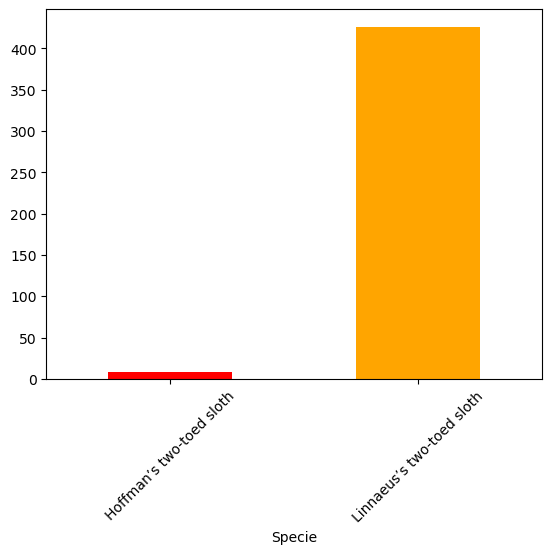

In [206]:
#See what species had the unwanted data
num_species_with_unwanted_values = rows_with_values_below_or_equal_to_zero.groupby(by='Specie').size();
display(num_species_with_unwanted_values);
plot = (num_species_with_unwanted_values).plot.bar(color=['red','orange'],rot=45)

Specie
Brown-throated sloth         1002
Hoffman’s two-toed sloth     1198
Linnaeus’s two-toed sloth    1140
Maned three-toed sloth        537
Pale-throated sloth          1050
Pygmy three-toed sloth         73
dtype: int64

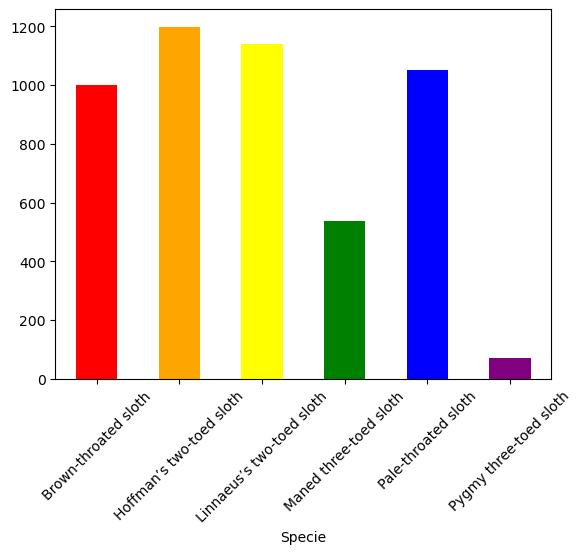

In [207]:
num_species = df.groupby(by='Specie').size();
display(num_species);
plot = num_species.plot.bar(color=['red','orange','yellow','green','blue','purple'],rot=45)

In [208]:
#Remove unwanted data
df = df[df['Tail Length'] > 0]

Specie
Brown-throated sloth         1002
Hoffman’s two-toed sloth     1189
Linnaeus’s two-toed sloth     714
Maned three-toed sloth        537
Pale-throated sloth          1050
Pygmy three-toed sloth         73
dtype: int64

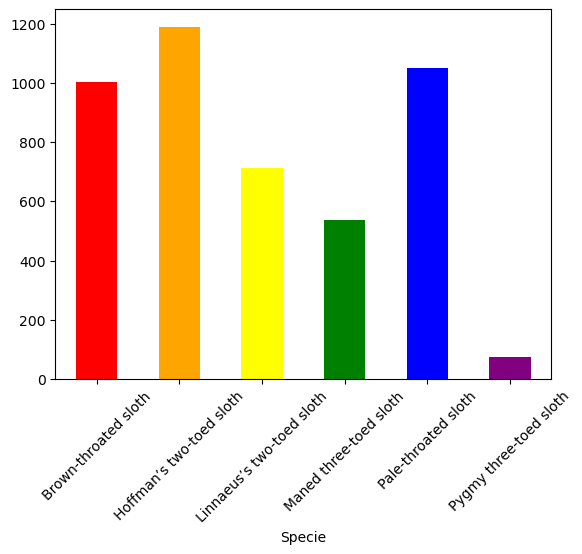

In [209]:
#Visualize Species Distribution after removal of unwanted data
num_species = df.groupby(by='Specie').size();
display(num_species);
plot = num_species.plot.bar(color=['red','orange','yellow','green','blue','purple'],rot=45)

In [210]:
#Remove Pygmy three-toed sloth from data
df = df[df['Specie'] != 'Pygmy three-toed sloth']


Specie
Brown-throated sloth         1002
Hoffman’s two-toed sloth     1189
Linnaeus’s two-toed sloth     714
Maned three-toed sloth        537
Pale-throated sloth          1050
dtype: int64

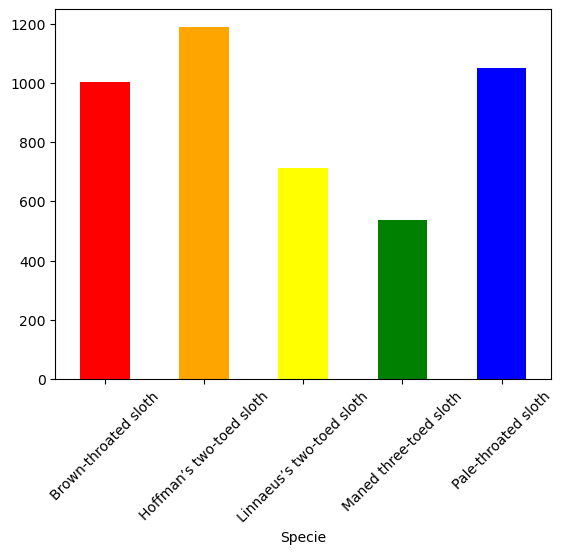

In [211]:
#Visualize Species Distribution after removal of Pygmy Sloth data
num_species = df.groupby(by='Specie').size();
display(num_species);
plot = num_species.plot.bar(color=['red','orange','yellow','green','blue'],rot=45)

In [212]:
#Getting Statistical Info on the cleaned data
df.describe()

,Claw Length,Size,Forelimb Toe Count,Tail Length,Weight
count,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000
mean,7.277353,60.032894,2.576358,3.776923,5.190785
std,1.482154,5.857144,0.494190,2.038821,1.213904
min,1.748000,46.928000,2.000000,0.001000,0.946000
25%,6.273000,59.544500,2.000000,1.974750,4.343000
50%,7.277000,62.167500,3.000000,4.145500,5.181500
75%,8.298250,63.858250,3.000000,5.427500,6.019500
max,12.171000,68.760000,3.000000,8.538000,9.997000


In [213]:
#Data is cleaned, Time to start training the model
X = df.drop(columns = 'Specie') #Independent Variables
y = df['Specie'] #Dependent Variable

In [214]:
#Split the Data into 30% testing and 70% training 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [215]:
#Check Independent Variables
X.head

<bound method NDFrame.head of       Claw Length    Size  Forelimb Toe Count  Tail Length  Weight
73          5.746  65.815                   3        5.069   4.175
74          9.977  63.677                   3        5.464   4.976
75          8.857  64.526                   3        6.742   5.847
76          8.941  63.789                   3        5.250   7.087
77          7.825  63.747                   3        5.422   4.951
...           ...     ...                 ...          ...     ...
4995        3.919  62.819                   2        3.176   4.247
4996        5.881  63.150                   2        1.535   4.056
4997        4.941  62.091                   2        1.905   5.194
4998        6.176  62.039                   2        1.164   5.035
4999        3.494  64.043                   2        1.512   6.384

[4492 rows x 5 columns]>

In [216]:
scaler = StandardScaler()

In [217]:
#Scaling the data
X_train_scaled = scaler.fit_transform(X_train)

In [218]:
X_test_scaled = scaler.transform(X_test)

In [219]:
X_train_scaled

array([[ 9.98502475e-01, -1.58034709e+00,  8.60174626e-01,
         7.51264216e-01, -4.13642406e-01],
       [-6.84155662e-02, -1.76290702e+00,  8.60174626e-01,
         6.24414622e-01, -8.61723906e-01],
       [ 5.66041414e-01, -1.43467485e+00,  8.60174626e-01,
         4.97075262e-01,  3.77217434e-02],
       ...,
       [ 1.32224675e-01,  6.10713660e-01, -1.16255464e+00,
        -7.99827146e-01,  2.33039321e-01],
       [-6.79148193e-01,  6.96272618e-01, -1.16255464e+00,
        -4.16339765e-01,  1.14643623e+00],
       [-5.89673491e-01,  6.21799784e-02,  8.60174626e-01,
         1.35955454e+00,  7.91949357e-04]])

In [220]:
X_test_scaled

array([[ 0.35726711,  0.67168082,  0.86017463,  0.73412238, -0.23309675],
       [ 0.82090875, -1.36448577,  0.86017463,  1.78369257,  0.37911717],
       [ 0.24203454,  1.22055606, -1.16255464, -1.47766436, -0.27330919],
       ...,
       [-0.07926098,  0.63991642, -1.16255464,  0.02004243, -0.97251329],
       [ 0.32608653, -1.82011711,  0.86017463,  0.35553267, -0.33239686],
       [-0.17144704,  0.03929595,  0.86017463, -0.52114985, -0.99220918]])

In [221]:
#Train Model
model = LogisticRegression(random_state=10).fit(X_train_scaled,y_train)

In [222]:
#Test the model
model.predict(X_train_scaled)

array(['Pale-throated sloth', 'Pale-throated sloth',
       'Pale-throated sloth', ..., 'Hoffman’s two-toed sloth',
       'Hoffman’s two-toed sloth', 'Brown-throated sloth'], dtype=object)

In [223]:
print(model.score(X_train_scaled,y_train))

0.9729643765903307


In [224]:
model.score(X_test_scaled,y_test)
print(model.score(X_test_scaled,y_test))

0.9629080118694362


In [225]:
#Generate Classification Report
predictions = model.predict(X_test_scaled)
report = classification_report(y_test,predictions)
print(report)

                           precision    recall  f1-score   support

     Brown-throated sloth       0.93      0.94      0.93       302
 Hoffman’s two-toed sloth       0.98      0.99      0.99       353
Linnaeus’s two-toed sloth       0.98      0.97      0.98       213
   Maned three-toed sloth       0.89      0.87      0.88       168
      Pale-throated sloth       1.00      1.00      1.00       312

                 accuracy                           0.96      1348
                macro avg       0.96      0.95      0.96      1348
             weighted avg       0.96      0.96      0.96      1348



In [226]:
#Generate Confusion Matrix
cm = confusion_matrix(y_test,predictions)

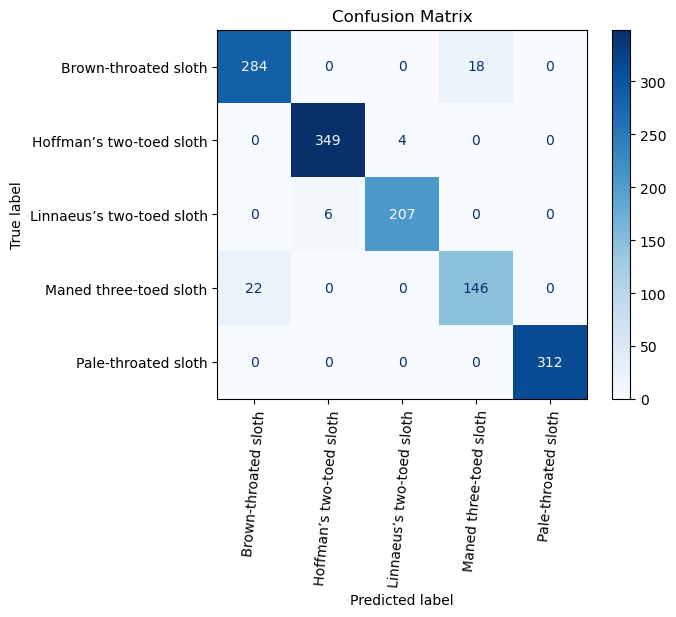

In [227]:
#Display Confusion Matrix 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap ='Blues',)
plt.title('Confusion Matrix')
plt.xticks(rotation = 85)
plt.show()


In [228]:
#Creating a UI
header_html = widgets.HTML("<h1 style=color:#34b575> Sloth Species Sleuth </h1>")
display(header_html)
sub_header_html = widgets.HTML("<h2 style=color:#34b575> Enter your Data below </h2>")
display(sub_header_html)
cl_widget = widgets.FloatText(description='Claw Length(cm) :',style={'description_width': 'initial'})
s_widget = widgets.FloatText(description='Size(cm) :')
f_widget = widgets.Dropdown(description='Forelimb Toe Count :',options=[2,3],style={'description_width': 'initial'})
t_widget = widgets.FloatText(description='Tail Length(cm) :',style={'description_width': 'initial'})
w_widget = widgets.FloatText(description='Weight(kg) :')

button_predict = widgets.Button(description='Predict the Species')
button_predict.style.button_color='#7ecca0'

output = widgets.Output()

def on_click_predict(b):
    with output:
        output.clear_output()
        input_data=pd.DataFrame([[cl_widget.value,s_widget.value,f_widget.value,t_widget.value,w_widget.value]],
                               columns = ['Claw Length', 'Size', 'Forelimb Toe Count', 'Tail Length','Weight'])
        input_data_scaled = scaler.transform(input_data)
        predict= model.predict(input_data_scaled)
        print(f" You most likely found {predict[0]}!")
button_predict.on_click(on_click_predict)

vb = widgets.VBox([cl_widget,s_widget,f_widget,t_widget,w_widget,button_predict,output])
display(vb)


HTML(value='<h1 style=color:#34b575> Sloth Species Sleuth </h1>')

HTML(value='<h2 style=color:#34b575> Enter your Data below </h2>')